<a href="https://colab.research.google.com/github/Tmana/TinyML-projects/blob/master/sinewavemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

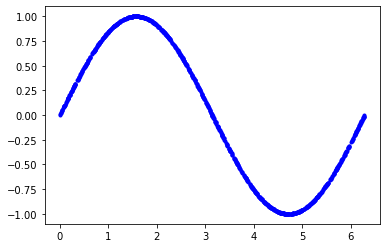

In [3]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random .uniform(low = 0, high = 2*math.pi, size = SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, 'b.')
plt.show()

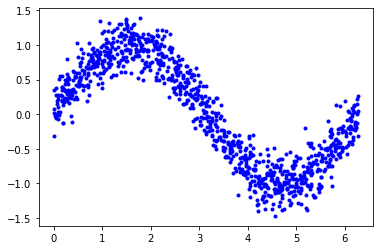

In [4]:
# fuzz the y_values
y_values += 0.2 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')

In [5]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT]) 
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

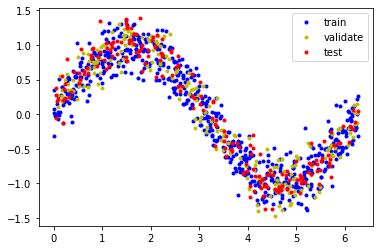

In [6]:
plt.plot(x_train, y_train, 'b.', label = 'train')
plt.plot(x_validate, y_validate, 'y.', label = 'validate')
plt.plot(x_test, y_test, 'r.', label = 'test')
plt.legend()
plt.show()

In [7]:
# use keras to perform simple NN regression
from keras import layers
model_1 = tf.keras.Sequential()

# first layer takes a scalar input and feeds it through 16 neurons, 
# which use a 'relu' activation function.
model_1.add(layers.Dense(16, activation = 'relu', input_shape =(1,)))

# final layer is a single neuron, because we want a signle scalar value as the output.
model_1.add(layers.Dense(1))

# compile model using the standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# print model architecture summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_1 = model_1.fit(x_train, y_train, epochs= 1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.8264 - mae: 0.7924 - val_loss: 0.6357 - val_mae: 0.7109
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.5142 - mae: 0.6306 - val_loss: 0.5191 - val_mae: 0.6197
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4509 - mae: 0.5775 - val_loss: 0.4723 - val_mae: 0.5886
Epoch 4/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.4142 - mae: 0.5525 - val_loss: 0.4345 - val_mae: 0.5592
Epoch 5/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3812 - mae: 0.5303 - val_loss: 0.3980 - val_mae: 0.5298
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3496 - mae: 0.5071 - val_loss: 0.3684 - val_mae: 0.5049
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3233 - mae: 0.4861 - val_loss: 0.3427 - val_mae: 0.4912
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

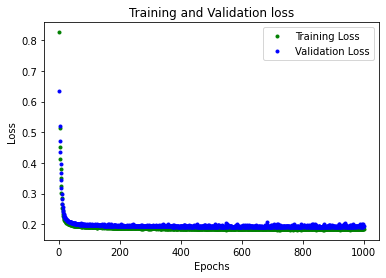

In [9]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'g.', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

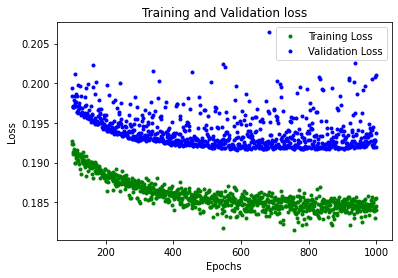

In [10]:
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label= 'Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

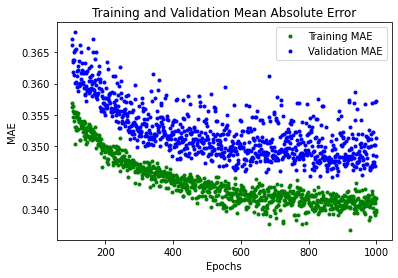

In [11]:
# Draw a graph of mean absolute error, measurement of amount of error of predictions


mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label= 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label= 'Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## This mean absolute error and loss arent very good! lets double check why this is by examining the validation data against the model predictions


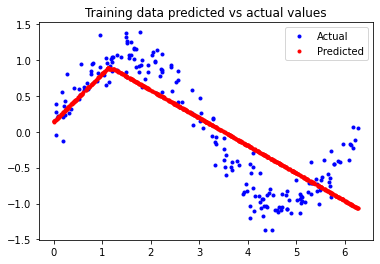

In [12]:


# use the model to make predictions from the validation data
predictions = model_1.predict(x_train)

# plot predictions along with the test data

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

 ## Uh oh! our model has over simplified, and is fitting a linear trend onto our very nonlinear sine wave. Lets make a second model with a large hidden layer

In [13]:
model_2 = tf.keras.Sequential()

# first layer takes a scalar input and feeds it through 16 neurons, 
# which use a 'relu' activation function.
model_2.add(layers.Dense(16, activation = 'relu', input_shape =(1,)))

# new second layer will allow the network to learn non-linear representations
model_2.add(layers.Dense(16, activation='relu'))

# final layer is a single neuron, because we want a signle scalar value as the output.
model_2.add(layers.Dense(1))

# compile model using the standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# print model architecture summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size=16, validation_data=(x_validate,y_validate))

Epoch 1/600
38/38 [==============================] - 0s 5ms/step - loss: 0.7422 - mae: 0.7373 - val_loss: 0.5150 - val_mae: 0.6198
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.4231 - mae: 0.5594 - val_loss: 0.4206 - val_mae: 0.5425
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3531 - mae: 0.5084 - val_loss: 0.3514 - val_mae: 0.4975
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2973 - mae: 0.4663 - val_loss: 0.2971 - val_mae: 0.4556
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2523 - mae: 0.4310 - val_loss: 0.2528 - val_mae: 0.4182
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2192 - mae: 0.4001 - val_loss: 0.2320 - val_mae: 0.3994
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2007 - mae: 0.3797 - val_loss: 0.2064 - val_mae: 0.3829
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1869 - m

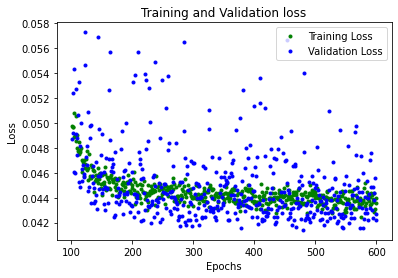

In [15]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label= 'Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

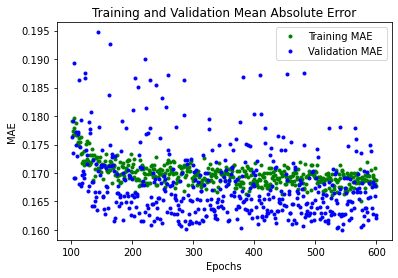

In [16]:
# Draw a graph of mean absolute error, measurement of amount of error of predictions


mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label= 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label= 'Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## This model is doing better, so lets see how it does performing predictions on our test data


7/7 [==============================] - 0s 1ms/step - loss: 0.0338 - mae: 0.1427


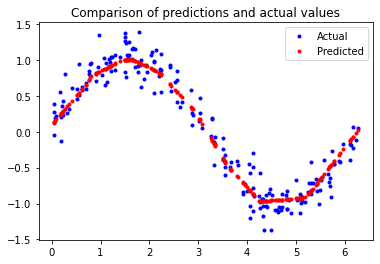

In [17]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_test, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

tensorflow lite model conversion writes the model weights and architecture to disk in a format called a flatbuffer, which is space efficient. Can also quantize the model, reducing the weights and biases from 32 bit floats to 8 bit integers, with minimal loss in accuracy, and a massive reduction in computation needs at runtime on our microcontroller.


In [30]:

#converting the model with QUANTIZATION
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# set optimizations for quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data x values as a 
# representative dataset, and use it with the converter
def representative_dataset_generator():
  for value in x_test:
    # each scalar value must be inside of a 2d array that is wrapped in a list
    yield [np.array(value, dtype = np.float32, ndim=2)]

# make the tflite model with the converter
tflite_model = converter.convert()

# save model to disk
open("sine_model_quantized.tflite", "wb" ).write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmpb00kdias/assets


INFO:tensorflow:Assets written to: /tmp/tmpb00kdias/assets


2928

/content
['.config', 'sine_model_quantized.tflite', 'sine_model_quantized.tflite,', 'sample_data']


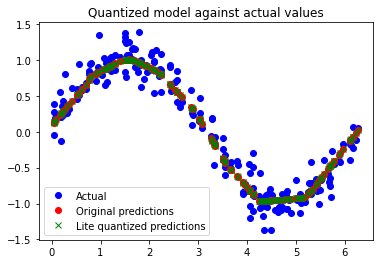

In [32]:
import os
print( os.getcwd() )
print( os.listdir() )
# Instantiate an interpreter for the tflite model
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for the model
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]['index']
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]['index']

# create array to store the results
sine_model_quantized_predictions = []

# Run the model interpreter for each value and store the results in arrays
for x_value in x_test:
  # create 2d tensor wrappng the current x_value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
  # write value to input tensor
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append( sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

plt.clf()
plt.title('Quantized model against actual values')
plt.plot(x_test, y_test, 'bo', label= 'Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label = 'Lite quantized predictions')
plt.legend()
plt.show()

### Now that we have a quantized model that will run more quickly and space efficiently, we need to convert it to a C source file that can be included in the binary and loaded directly into memory on a microcontroller

In [ ]:
# converting model to source c file

# Install xxd if not available
!apt-get -qq install xxd
# save tflite model as C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc

# print source file
!cat sine_model_quantized.cc